In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ML model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
#load dataset
data=load_breast_cancer()
X=data.data
y=data.target

#create DataFrame for EDA
df = pd.DataFrame(X, columns=data.feature_names)
df['target']=y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


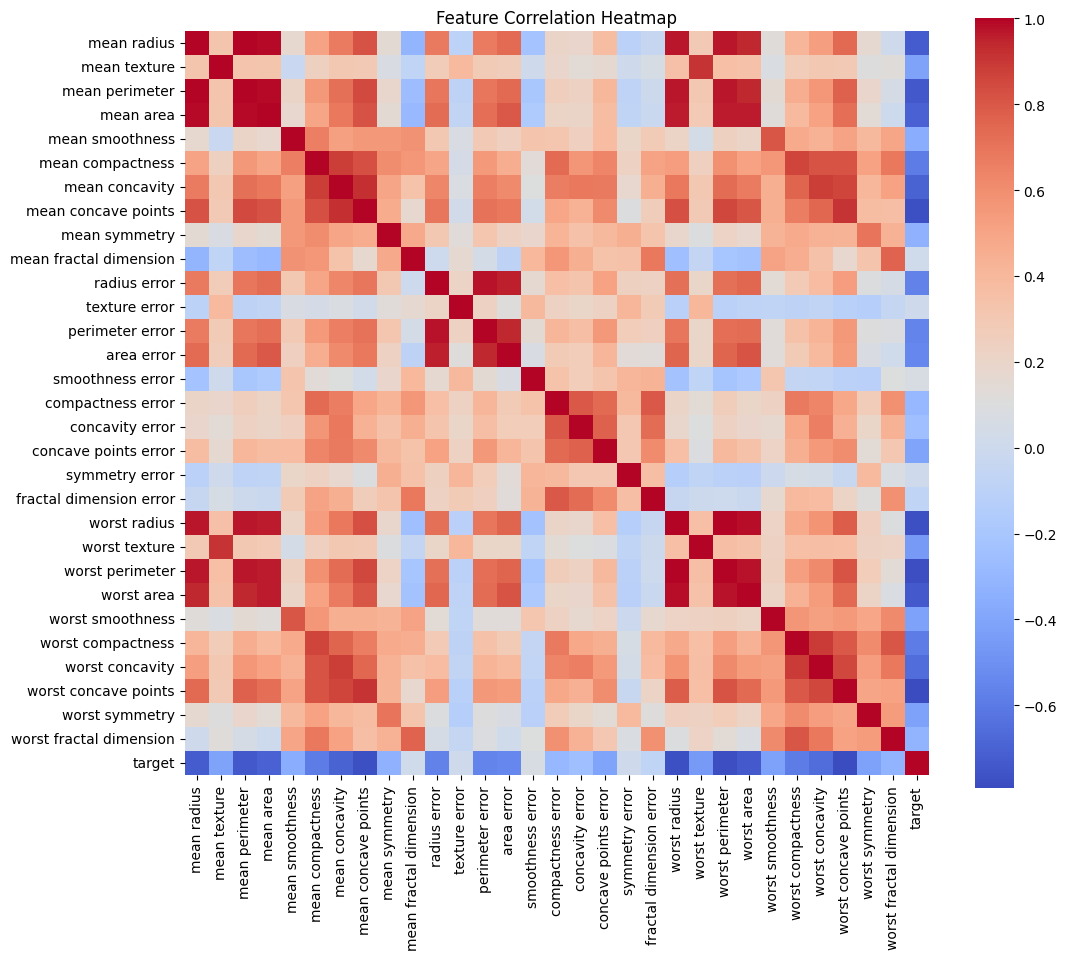

In [5]:
#visualize the dataset

#correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="coolwarm",square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
#Preprocessing

#normalize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [7]:
#Train with SVM and LinearKernel

svm_linear=SVC(kernel='linear',C=0.1)
svm_linear.fit(X_train,y_train)

y_pred_linear=svm_linear.predict(X_test)

print("Linear SVM Classification Report:")
print(classification_report(y_test,y_pred_linear))

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



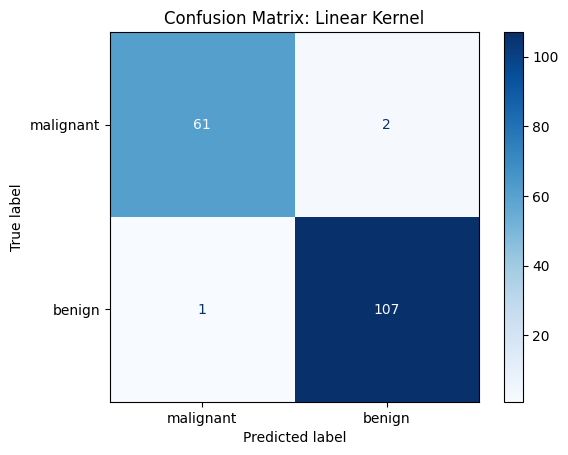

In [8]:
#confusion matrix display for linear kernel
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear), display_labels=data.target_names).plot(cmap="Blues")
plt.title("Confusion Matrix: Linear Kernel")
plt.show()

In [9]:
#Train SVM with RBF Kernel

svm_rbf=SVC(kernel='rbf',C=1.0,gamma='scale')
svm_rbf.fit(X_train,y_train)

y_pred_rbf=svm_rbf.predict(X_test)

print("RBF Kernel SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



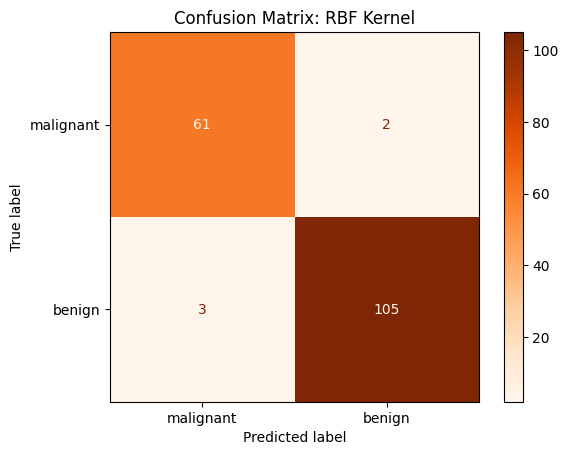

In [10]:
#confusion matrix display for rbf kernel
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf), display_labels=data.target_names).plot(cmap="Oranges")
plt.title("Confusion Matrix: RBF Kernel")
plt.show()

In [11]:
#cross-validation performance
scores = cross_val_score(SVC(kernel='linear', C=1.0), X_scaled, y, cv=5)
print(f"Linear SVM Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

scores = cross_val_score(SVC(kernel='rbf', C=1.0), X_scaled, y, cv=5)
print(f"RBF SVM Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Linear SVM Cross-Validation Accuracy: 0.9701 ± 0.0105
RBF SVM Cross-Validation Accuracy: 0.9736 ± 0.0147


In [12]:
#Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_scaled, y)

print("Best Parameters Found:", grid.best_params_)
print("Best Accuracy Score:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters Found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy Score: 0.9789318428815401


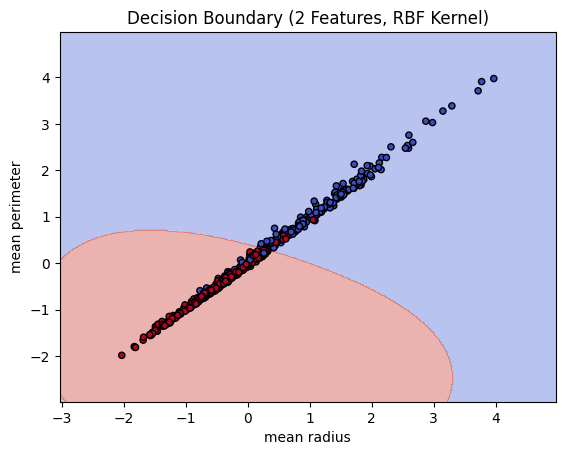

In [13]:
#visual decisiono boundary(2D)
# Use only two features for 2D visualization
X_vis = X[:, [0, 2]]  # mean radius and mean perimeter
X_vis_scaled = StandardScaler().fit_transform(X_vis)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vis_scaled, y, test_size=0.3, random_state=42)

svm_vis = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_vis.fit(X_train2, y_train2)

# Create a meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[2])
plt.title("Decision Boundary (2 Features, RBF Kernel)")
plt.show()